## Final Project Submission

Please fill out:
* Student name: Fiona Kungu
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL: N/A


MICROSOFT MOVIE ANALYSIS:

OVERVIEW:
I have been tasked with assisting Microsoft in their venture into the movie industry. My goal was to explore what type of films are currently doing the best at the box office and to provide these findings to Microsoft's new movie studio executives. My analysis of the movie industry, achieved by garnering data and utilizing descriptive statistics and visualizations, has shown that a larger budget is correlated with a higher worldwide box office gross. By allocating 75 million to 200 million dollars to produce an animated musical movie released in June or November, or allocating 200 to 400 million dollars to produce a live action super hero movie released in April or May, the data shows that a movie studio will be extremely likely to succeed. I have also given recommendations as to which composers should be hired for an animated musical movie, and which directors should be hired for a super hero movie. Microsoft can use this report to target their production budget, genre, creative type, production method, release-time, and crew members of their u

BUSINESS PROBLEM:
Since Microsoft has no idea where to start once they venture into creating original video content, an analyst which is me, has been given the role to explore different types of films over the years, in order to come up with a concrete  and legitimate findings for Microsoft to work with as they get into filming business.

I have based my findings on:
        - profit aganst the worldwide gross
        -Movie type/Genre that is most watched
        -Production budget aganst the total profits made

DATA UNDERSTANDING:

I utilized  data sources for my analysis in order to have a fathomable view of the industry as it currently is.

-movie budgets csv: a free dataset available upon request for academic research, comprised of over 3,000 enrties of movies with a production year from 1994 to 2018, with a production budget greater than or equal to ten million dollars. This dataset contains values for movie name, production budget, domestic and international gross, genre, production method, runtime, and movie board rating.



In [1]:
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import requests
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


MOVIE_BUDGET_DATA:

In [2]:
#getting a preview of the data
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv' , index_col=0)
#the first 5
movie_budgets_df.head()



,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#getting the info of the Dataframe
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [4]:
#
movie_budgets_df.dtypes

release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

DATA CLEANING:

In [5]:
#getting rid of the $ sign and the commas for easier conversion to interger
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace('$', "").str.replace(",", "")


In [6]:
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].str.replace('$', "").str.replace(",", "")


In [7]:
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace('$', "").str.replace(",", "")


In [8]:
#necesary changes have been made 
movie_budgets_df.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [9]:
#changing the production budget , domestic gross and world wide gross to integer
def convert_price_to_int64(df, column_name):
    # Remove commas and dollar signs from the column
    df[column_name] = df[column_name].str.replace(',', '', regex=False).str.replace('$', '', regex=False)
    # Convert to int64
    df[column_name] = df[column_name].astype('int64')
    return df

convert_price_to_int64(movie_budgets_df, 'production_budget')
convert_price_to_int64(movie_budgets_df, 'domestic_gross')
convert_price_to_int64(movie_budgets_df, 'worldwide_gross')

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000,0,0
79,"Apr 2, 1999",Following,6000,48482,240495
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [10]:
movie_budgets_df = movie_budgets_df.loc[~((movie_budgets_df['production_budget'] == 0) | (movie_budgets_df['domestic_gross'] == 0) | (movie_budgets_df['worldwide_gross'] == 0))]

In [11]:
movie_budgets_df['production_budget'].describe()

count        5234.00
mean     34033480.05
std      42960481.08
min          1100.00
25%       6500000.00
50%      20000000.00
75%      45000000.00
max     425000000.00
Name: production_budget, dtype: float64

In [12]:
movie_budgets_df.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [13]:
movie_budgets_df.isnull().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [14]:
# renaming columns
movie_budgets_df = movie_budgets_df.rename(columns = {'released':'release_date', 'domestic_gross':'dom_gross', 'worldwide_gross':'world_gross', 'production_budget': 'budget'})
# showing all column names
movie_budgets_df.columns

Index(['release_date', 'movie', 'budget', 'dom_gross', 'world_gross'], dtype='object')

In [15]:
movie_budgets_df.head()

,release_date,movie,budget,dom_gross,world_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [16]:
# Filter the DataFrame to include only years above 2015
movie_budgets_df["release_date"] = movie_budgets_df["release_date"].str[-4:]

In [17]:
movie_budgets_df

,release_date,movie,budget,dom_gross,world_gross
id,,,,,
1,2009,Avatar,425000000,760507625,2776345279
2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,2019,Dark Phoenix,350000000,42762350,149762350
4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963
5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
76,2006,Cavite,7000,70071,71644
77,2004,The Mongol King,7000,900,900
79,1999,Following,6000,48482,240495


In [18]:
#extracting the release_date column to get the years movies were released
df = movie_budgets_df["release_date"].str[-4:]

In [19]:
df

id
1     2009
2     2011
3     2019
4     2015
5     2017
      ... 
76    2006
77    2004
79    1999
80    2005
82    2005
Name: release_date, Length: 5234, dtype: object

In [20]:
#conversion of release date to an integer
convert_price_to_int64(movie_budgets_df, 'release_date')

,release_date,movie,budget,dom_gross,world_gross
id,,,,,
1,2009,Avatar,425000000,760507625,2776345279
2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,2019,Dark Phoenix,350000000,42762350,149762350
4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963
5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
76,2006,Cavite,7000,70071,71644
77,2004,The Mongol King,7000,900,900
79,1999,Following,6000,48482,240495


In [21]:
# Filter the DataFrame to include only years above 2015
movie_budgets_df = movie_budgets_df[movie_budgets_df['release_date'] >= 2015]
movie_budgets_df

,release_date,movie,budget,dom_gross,world_gross
id,,,,,
3,2019,Dark Phoenix,350000000,42762350,149762350
4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963
5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
6,2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
7,2018,Avengers: Infinity War,300000000,678815482,2048134200
...,...,...,...,...,...
86,2017,A Ghost Story,100000,1594798,2769782
2,2015,Dawn of the Crescent Moon,75000,8799,8799
20,2015,Counting,50000,8374,8374


In [22]:
# show number of rows and columns after filtering
movie_budgets_df.shape

(730, 5)

In [23]:
movie_budgets_df.isnull().sum()

release_date    0
movie           0
budget          0
dom_gross       0
world_gross     0
dtype: int64

In [24]:
# getting value counts for  column
#movie_budgets_df = movie_budgets_df.groupby(["release_date", "budget"])
#movie_budgets_df.first()

In [25]:
movie_budgets_df

,release_date,movie,budget,dom_gross,world_gross
id,,,,,
3,2019,Dark Phoenix,350000000,42762350,149762350
4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963
5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
6,2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
7,2018,Avengers: Infinity War,300000000,678815482,2048134200
...,...,...,...,...,...
86,2017,A Ghost Story,100000,1594798,2769782
2,2015,Dawn of the Crescent Moon,75000,8799,8799
20,2015,Counting,50000,8374,8374


DATA ANALYSIS:

In [26]:
#add total_gross column in the dataframe that is the total values of domestic_gross and worldwide_gross
movie_budgets_df['total_gross'] = movie_budgets_df['dom_gross'] + movie_budgets_df['world_gross']
#add gross_profits column in the dataframe that is the difference between total_gross and domestic_gross
movie_budgets_df['gross_profits']= movie_budgets_df['total_gross'] - movie_budgets_df['budget']

In [27]:
movie_budgets_df

,release_date,movie,budget,dom_gross,world_gross,total_gross,gross_profits
id,,,,,,,
3,2019,Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129
6,2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445,2683973445
7,2018,Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682
...,...,...,...,...,...,...,...
86,2017,A Ghost Story,100000,1594798,2769782,4364580,4264580
2,2015,Dawn of the Crescent Moon,75000,8799,8799,17598,-57402
20,2015,Counting,50000,8374,8374,16748,-33252


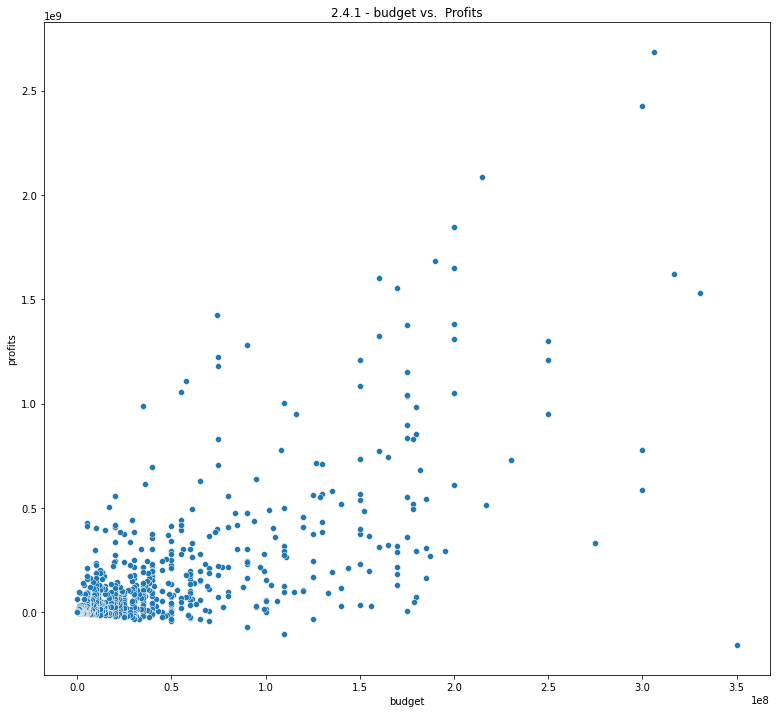

In [28]:
#data visualization
fig,ax = plt.subplots(figsize = (13,12))
sns.scatterplot(movie_budgets_df['budget'],  movie_budgets_df['gross_profits'] )
ax.set_xlabel('budget')
ax.set_ylabel('profits')
plt.title('2.4.1 - budget vs.  Profits')
plt.show()

In [29]:
movie_budgets_df.groupby(["budget"])["gross_profits"].mean()

budget
27000           -19906.00
30000           259644.00
50000           -33252.00
75000           -57402.00
100000        34292732.00
                 ...     
300000000   1263871428.00
306000000   2683973445.00
317000000   1619903129.00
330600000   1531419831.00
350000000   -157475300.00
Name: gross_profits, Length: 181, dtype: float64

In [30]:
# creating subset of DataFrame where genre is Musical
df = movie_budgets_df.loc[movie_budgets_df['release_date']=='year']
movie_budgets_df.sort_values(by='gross_profits', ascending=False).head()

,release_date,movie,budget,dom_gross,world_gross,total_gross,gross_profits
id,,,,,,,
6,2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445,2683973445
7,2018,Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682
34,2015,Jurassic World,215000000,652270625,1648854864,2301125489,2086125489
42,2018,Black Panther,200000000,700059566,1348258224,2048317790,1848317790
67,2015,Furious 7,190000000,353007020,1518722794,1871729814,1681729814


EXTRACTING NECESSARY DATA FOR ANALYSIS:
Extracing data from tmdb file, for cleaning and getting our data from the needed columns

In [31]:
# Loading the tmdb Dataframe
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [32]:
#Look at data info
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [33]:
#sorting by the "popularity" column in ascending order
tmdb_movies_df.sort_values(by=["popularity"], ascending=True).head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13258,[99],403294,en,9/11: Simulations,0.60,2014-07-04,9/11: Simulations,10.00,1
11010,[],203325,en,Slaves Body,0.60,2013-06-25,Slaves Body,0.50,1
11011,[99],186242,en,Re-Emerging: The Jews of Nigeria,0.60,2013-05-17,Re-Emerging: The Jews of Nigeria,0.50,2
11012,[99],116868,en,Occupation: Fighter,0.60,2013-08-02,Occupation: Fighter,0.50,2
11013,[99],85337,en,Wonders Are Many: The Making of Doctor Atomic,0.60,2013-08-07,Wonders Are Many: The Making of Doctor Atomic,0.50,2


In [34]:
# some titles are precisely unpopular with popularity as low as 0.6 and vote_counts as low as 1
tmdb_movies_df.vote_count.mean()

#the mean is quite low

194.22483689708488

In [35]:

#getting the first 5 vote_counts in the dataframe from highest to lowest 
tmdb_movies_df.sort_values(by=["vote_count"], ascending=False).head(5)


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
17383,"[28, 12, 35]",293660,en,Deadpool,35.07,2016-02-12,Deadpool,7.60,20175
5179,"[878, 28, 12]",24428,en,The Avengers,50.29,2012-05-04,The Avengers,7.60,19673
6,"[28, 12, 14, 878]",19995,en,Avatar,26.53,2009-12-18,Avatar,7.40,18676
11032,"[12, 18, 878]",157336,en,Interstellar,28.44,2014-11-05,Interstellar,8.20,18597


DATA CLEANING/FILTERING:
And the cleaning begins!

In [36]:
# creating a list of all the vote_counts and sorting them
vote_counts = tmdb_movies_df['vote_count'].tolist()
vote_counts_sorted = sorted(vote_counts)

In [37]:
# Define a function to filter a list to values between two numbers
def filter_list(lst, min_val, max_val):
    filtered_list = [x for x in lst if (x > min_val) and (x < max_val)]
    return filtered_list

In [38]:
# getting the number of movies that have vote counts between 1000 and 23000
num_movies = len(filter_list(vote_counts_sorted, 999, 23000))
num_movies

1108

In [39]:
# Filtering the DataFrame to only include movies with vote counts of 1000 or more
filtered_tmdb = tmdb_movies_df[tmdb_movies_df['vote_count'] >= 1000]
filtered_tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...
24112,"[53, 18, 80, 9648]",446791,en,All the Money in the World,10.94,2017-12-25,All the Money in the World,6.40,1200
24128,"[35, 18, 878]",301337,en,Downsizing,10.68,2017-12-22,Downsizing,5.10,1887
24169,"[16, 18, 9648]",339877,en,Loving Vincent,10.03,2017-09-22,Loving Vincent,8.20,1200
24231,[18],538362,it,Sulla mia pelle,9.16,2018-09-12,On My Skin,8.20,1078


In [40]:
# Find duplicates based on all columns
duplicates = filtered_tmdb.duplicated()

# Filter the DataFrame to show only the duplicate rows
duplicate_rows = filtered_tmdb[duplicates]

# Print the duplicate rows
print(len(duplicate_rows))

125


In [41]:
# dropping duplicates
tmdb_movies_df = filtered_tmdb.drop_duplicates(subset='original_title').reset_index(drop=True)
tmdb_movies_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...
975,"[35, 10749, 14]",433310,en,When We First Met,12.37,2018-02-09,When We First Met,6.60,1433
976,"[878, 9648, 18, 53, 10770]",569547,en,Black Mirror: Bandersnatch,12.28,2018-12-28,Black Mirror: Bandersnatch,7.00,1932
977,[27],433808,en,The Ritual,11.54,2018-02-09,The Ritual,6.00,1088
978,[18],538362,it,Sulla mia pelle,9.16,2018-09-12,On My Skin,8.20,1078


In [42]:
# Filter the DataFrame to contain movies released in or after 2015
tmdb_df_filtered = tmdb_movies_df[tmdb_movies_df['release_date'] >= '2015-01-01']
tmdb_df_filtered

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
442,"[80, 35, 28, 12]",207703,en,Kingsman: The Secret Service,26.10,2015-02-13,Kingsman: The Secret Service,7.60,10287
464,"[27, 53]",270303,en,It Follows,18.42,2015-03-27,It Follows,6.50,3485
486,"[35, 10749, 80, 18, 9648]",171274,en,Inherent Vice,14.24,2015-01-09,Inherent Vice,6.60,1359
509,"[35, 27]",246741,en,What We Do in the Shadows,11.19,2015-02-13,What We Do in the Shadows,7.60,1594
544,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.38,2015-05-01,Avengers: Age of Ultron,7.30,13457
...,...,...,...,...,...,...,...,...,...
974,"[12, 878, 10751, 14]",407451,en,A Wrinkle in Time,12.53,2018-03-09,A Wrinkle in Time,5.00,1073
975,"[35, 10749, 14]",433310,en,When We First Met,12.37,2018-02-09,When We First Met,6.60,1433
976,"[878, 9648, 18, 53, 10770]",569547,en,Black Mirror: Bandersnatch,12.28,2018-12-28,Black Mirror: Bandersnatch,7.00,1932
977,[27],433808,en,The Ritual,11.54,2018-02-09,The Ritual,6.00,1088


In [43]:
#checking for missing values
missing_values_count = tmdb_df_filtered.isnull().sum()
missing_values_count

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [44]:
# genre_ids are list of numbers, actually in a string. 
tmdb_df_filtered.iloc[0]['genre_ids']

'[80, 35, 28, 12]'

In [45]:
#matching the genre_ids to the respective genre name from tmbd website
genre_dict = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

In [46]:
# creating a dataframe with id and genre columns
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns=['genre'])
genre_df.index.name = 'id'
genre_df.reset_index(inplace=True)
genre_df

,id,genre
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [47]:
#defining a function for removing the brackets from the string in 'genre_ids' and converting each item into an integer
def split_ids(string):
    string = string.replace('[','').replace(']','')  # remove square brackets
    numbers = list(string.split(','))
    new_list = []
    for i in numbers:
        new_list.append(int(i))
    return new_list

In [48]:
#applying the "split_ids" function to each value in the "genre_ids" 
tmdb_df_filtered['genre_ids'] = tmdb_df_filtered['genre_ids'].apply(lambda x: split_ids(x))

In [49]:
# Define a function to map genre IDs to genre names
def get_genre_names(ids):
    names = []
    for id in ids:
        names.append(genre_dict[id])
    return names


In [50]:
# Applying the function to the "genre_ids" column and create a new "genre_names" column
tmdb_df_filtered['genre_names'] = tmdb_df_filtered['genre_ids'].apply(lambda x: get_genre_names(x))

In [51]:
#confirming that the data is cleaned and ready for analysis 
tmdb_df_filtered.head()
#it is clean

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
442,"[80, 35, 28, 12]",207703,en,Kingsman: The Secret Service,26.10,2015-02-13,Kingsman: The Secret Service,7.60,10287,"[Crime, Comedy, Action, Adventure]"
464,"[27, 53]",270303,en,It Follows,18.42,2015-03-27,It Follows,6.50,3485,"[Horror, Thriller]"
486,"[35, 10749, 80, 18, 9648]",171274,en,Inherent Vice,14.24,2015-01-09,Inherent Vice,6.60,1359,"[Comedy, Romance, Crime, Drama, Mystery]"
509,"[35, 27]",246741,en,What We Do in the Shadows,11.19,2015-02-13,What We Do in the Shadows,7.60,1594,"[Comedy, Horror]"
544,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.38,2015-05-01,Avengers: Age of Ultron,7.30,13457,"[Action, Adventure, Science Fiction]"


DATA ANALYSIS AND VISUALIZATION:


In [52]:
#merging tmdb data set and the movie_budget dataset to get a solid analysis of budget and genre

merged_df = pd.merge(tmdb_df_filtered, movie_budgets_df , how='inner', left_on='title', right_on='movie')
merged_df 

,genre_ids,id,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,genre_names,release_date_y,movie,budget,dom_gross,world_gross,total_gross,gross_profits
0,"[80, 35, 28, 12]",207703,en,Kingsman: The Secret Service,26.10,2015-02-13,Kingsman: The Secret Service,7.60,10287,"[Crime, Comedy, Action, Adventure]",2015,Kingsman: The Secret Service,94000000,128261724,404561724,532823448,438823448
1,"[27, 53]",270303,en,It Follows,18.42,2015-03-27,It Follows,6.50,3485,"[Horror, Thriller]",2015,It Follows,2000000,14674077,23250755,37924832,35924832
2,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.38,2015-05-01,Avengers: Age of Ultron,7.30,13457,"[Action, Adventure, Science Fiction]",2015,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
3,"[878, 28, 12]",102899,en,Ant-Man,32.72,2015-07-17,Ant-Man,7.10,11949,"[Science Fiction, Action, Adventure]",2015,Ant-Man,130000000,180202163,518858449,699060612,569060612
4,"[28, 12, 80]",206647,en,Spectre,30.32,2015-11-06,Spectre,6.40,6719,"[Action, Adventure, Crime]",2015,Spectre,300000000,200074175,879620923,1079695098,779695098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,"[9648, 27, 53]",406563,en,Insidious: The Last Key,16.02,2018-01-05,Insidious: The Last Key,6.10,1306,"[Mystery, Horror, Thriller]",2018,Insidious: The Last Key,10000000,67745330,167885588,235630918,225630918
318,"[35, 18, 10749]",449176,en,"Love, Simon",15.61,2018-03-16,"Love, Simon",8.20,3165,"[Comedy, Drama, Romance]",2018,"Love, Simon",10000000,40826341,65520633,106346974,96346974
319,"[53, 27]",460019,en,Truth or Dare,14.35,2018-04-13,Truth or Dare,6.00,2005,"[Thriller, Horror]",2018,Truth or Dare,3500000,41411015,95127344,136538359,133038359
320,"[10752, 18, 36, 28]",429351,en,12 Strong,13.18,2018-01-19,12 Strong,5.60,1312,"[War, Drama, History, Action]",2018,12 Strong,35000000,45819713,71118378,116938091,81938091


In [53]:
#drop irrelevant columns since they appear in both dataframes
tmbd_mb_df = merged_df.drop(['dom_gross', 'title', 'original_language', 'release_date_x', 'movie', 'id', 'vote_count'], axis=1)
tmbd_mb_df

,genre_ids,original_title,popularity,vote_average,genre_names,release_date_y,budget,world_gross,total_gross,gross_profits
0,"[80, 35, 28, 12]",Kingsman: The Secret Service,26.10,7.60,"[Crime, Comedy, Action, Adventure]",2015,94000000,404561724,532823448,438823448
1,"[27, 53]",It Follows,18.42,6.50,"[Horror, Thriller]",2015,2000000,23250755,37924832,35924832
2,"[28, 12, 878]",Avengers: Age of Ultron,44.38,7.30,"[Action, Adventure, Science Fiction]",2015,330600000,1403013963,1862019831,1531419831
3,"[878, 28, 12]",Ant-Man,32.72,7.10,"[Science Fiction, Action, Adventure]",2015,130000000,518858449,699060612,569060612
4,"[28, 12, 80]",Spectre,30.32,6.40,"[Action, Adventure, Crime]",2015,300000000,879620923,1079695098,779695098
...,...,...,...,...,...,...,...,...,...,...
317,"[9648, 27, 53]",Insidious: The Last Key,16.02,6.10,"[Mystery, Horror, Thriller]",2018,10000000,167885588,235630918,225630918
318,"[35, 18, 10749]","Love, Simon",15.61,8.20,"[Comedy, Drama, Romance]",2018,10000000,65520633,106346974,96346974
319,"[53, 27]",Truth or Dare,14.35,6.00,"[Thriller, Horror]",2018,3500000,95127344,136538359,133038359
320,"[10752, 18, 36, 28]",12 Strong,13.18,5.60,"[War, Drama, History, Action]",2018,35000000,71118378,116938091,81938091


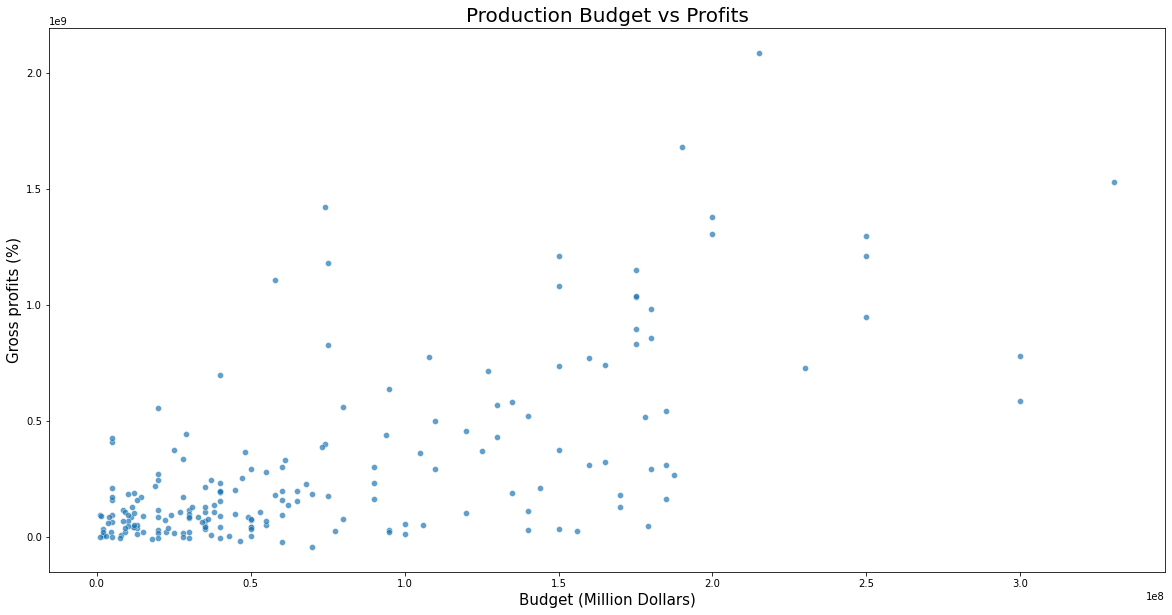

In [62]:
#running a scatter plot inorder to get the budget against the profits
fig, ax = plt.subplots(figsize=(20,10))
# convert production_budget to million dollars
merged_df['budget(In Million USD'] = merged_df['budget'] / 1000000
sns.scatterplot(x='budget', y='gross_profits', data=tmbd_mb_df.head(200), palette='viridis', alpha=0.7)
ax.set_xlabel('Budget (Million Dollars)', fontsize=15)
ax.set_ylabel('Gross profits (%)', fontsize=15)
ax.set_title('Production Budget vs Profits', fontsize=20);

This shows that there is a positive return the higher the investment the better the profits.

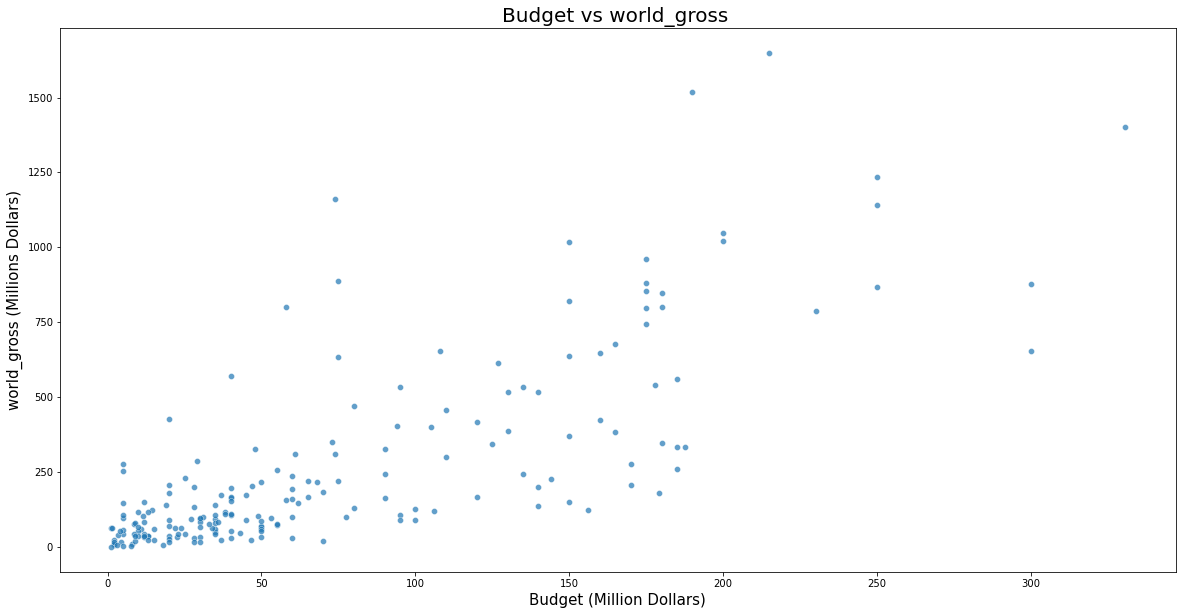

In [63]:
fig, ax = plt.subplots(figsize=(20,10))
# convert production_budget to million dollars
merged_df['budget_million'] = merged_df['budget'] / 1000000
merged_df['world_gross_milion'] = merged_df['world_gross'] / 1000000
sns.scatterplot(x='budget_million', y='world_gross_milion', data=merged_df.head(200), palette='viridis', alpha=0.7)
ax.set_xlabel('Budget (Million Dollars)', fontsize=15)
ax.set_ylabel('world_gross (Millions Dollars)', fontsize=15)
ax.set_title('Budget vs world_gross ', fontsize=20);

The correlation between Budget Vs World_gross is more or less the same as the Budgets Vs Profits

In [56]:
# creating a DF for genre popularity
genre_popl = pd.DataFrame(columns=['popularity', 'original_title', 'vote_average','genre','gross_profits'])
#iterate through each row of the original dataset and for each row, extract the list of genre ids
for i in range(len(merged_df)):
    ids = merged_df['genre_ids'][i]
    for j in range(len(ids)):
        popularity = merged_df.iloc[i]['popularity']
        title = merged_df.iloc[i]['original_title']
        avg = merged_df.iloc[i]['vote_average']
        genre = int(ids[j])
        budget = merged_df.iloc[i]['budget']
        revenue = merged_df.iloc[i]['world_gross']
        roi = ((revenue - budget) / budget)*100 if budget != 0 else 0
        values = [popularity, title, avg, genre, roi]
        zipped = zip(genre_popl.columns, values)
        to_append = dict(zipped)
        genre_popl = genre_popl.append(to_append, True)

In [57]:
genre_popl.head()

,popularity,original_title,vote_average,genre,gross_profits
0,26.10,Kingsman: The Secret Service,7.60,80,330.38
1,26.10,Kingsman: The Secret Service,7.60,35,330.38
2,26.10,Kingsman: The Secret Service,7.60,28,330.38
3,26.10,Kingsman: The Secret Service,7.60,12,330.38
4,18.42,It Follows,6.50,27,1062.54


In [58]:
# merging the genre_popl with the genre_df
genre_popl_merged = genre_popl.merge(genre_df, left_on="genre", right_on="id")
genre_popl_merged

,popularity,original_title,vote_average,genre_x,gross_profits,id,genre_y
0,26.10,Kingsman: The Secret Service,7.60,80,330.38,80,Crime
1,30.32,Spectre,6.40,80,193.21,80,Crime
2,24.52,Chappie,6.70,80,114.29,80,Crime
3,20.68,The Hateful Eight,7.70,80,138.49,80,Crime
4,20.47,Sicario,7.30,80,181.31,80,Crime
...,...,...,...,...,...,...,...
918,19.61,Allied,6.70,10752,12.52,10752,War
919,31.62,Wonder Woman,7.30,10752,447.42,10752,War
920,24.36,Dunkirk,7.40,10752,233.22,10752,War
921,23.45,War for the Planet of the Apes,7.00,10752,222.10,10752,War


In [59]:
# getting value counts for genre column
genre_popl_merged['genre_y'].value_counts()

Drama              130
Action             113
Adventure          102
Comedy              99
Thriller            97
Science Fiction     69
Fantasy             53
Crime               44
Horror              43
Family              41
Mystery             33
Romance             32
Animation           29
History             20
War                  7
Music                6
Western              5
Name: genre_y, dtype: int64

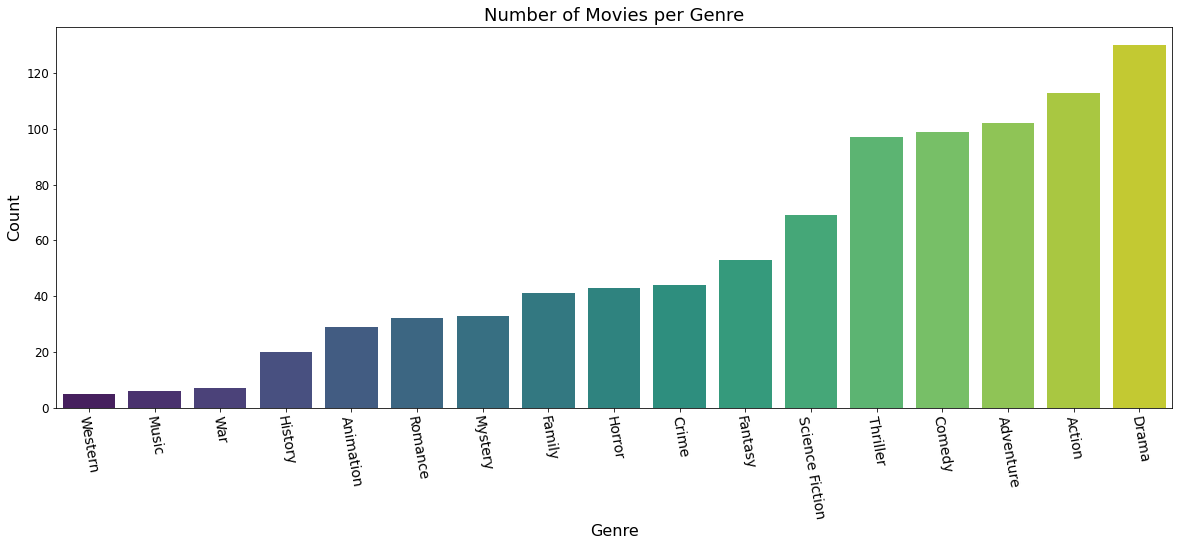

In [60]:
#Plotting the number of most watched genres in the movie dataset
plt.figure(figsize=(20, 7))
#Sort the genres by ascending count
genre_counts_sorted = genre_popl_merged['genre_y'].value_counts().sort_values()
sns.countplot(x='genre_y', data=genre_popl_merged, palette='viridis',
order=genre_counts_sorted.index)
#Setting title, labels, and tick sizes
plt.title('Number of Movies per Genre', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14, rotation=-80)
plt.yticks(fontsize=12)
#Display the plot
plt.show()

CONCLUSION:
People have always loved to be entertained, and as much as one might have their preference there's the majority and according to the above Drama takes the lead.

Movie Analysis:
-Animated films that are also family based are highly watched with a   touch of comedy,
-The higer the production budget the better the results